#**Fase 3**

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
tiempo_lim = 30     # límite de tiempo
presas = []         # array para evolución temporal número de presas
depred = []         # array para evolución temporal número de depredadores
tiempo = []         # array evolución del tiempo
pp = 50.0           # número inicial de presas
dd = 100.0          # número inicial de depredadores

##constantes para calcular los rates

c1 = 1.0
c2 = 0.005
c3 = 0.6

currTime=0          # tiempo actual
t0 = 0

while (currTime < tiempo_lim):
  # proceso a)
  if (pp > 0) & (dd > 0): 
    rate1 = c1*pp 
    rate2 = c2*pp*dd
    rate3 = c3*dd
    rate = rate1 + rate2 + rate3
    p1 = rate1/rate
    p2 = rate2/rate
    p3 = rate3/rate

    t = np.random.exponential(1/rate)
    
    ganador = np.random.multinomial(1, [p1, p2, p3])

    if ganador[0] == 1: #gana p1
      pp += 1
      presas.append(pp)
      depred.append(dd)
    if ganador[1] == 1: #gana p2
      pp -= 1
      dd += 1
      presas.append(pp)
      depred.append(dd)
    if ganador[2] == 1: #gana p3
      dd -= 1
      presas.append(pp)
      depred.append(dd)

    currTime += t
    tiempo.append(currTime)

  # proceso b)
  if (pp > 0) & (dd == 0):
    rate = c1*pp  
    t = np.random.exponential(1/rate)

    pp += 1
    presas.append(pp)
    depred.append(dd)
    

    currTime += t
    tiempo.append(currTime)
    
  # proceso c)
  if (dd > 0) & (pp == 0):
    rate = c3*dd
    t = np.random.exponential(1/rate)
    
    dd -= 1
    presas.append(pp)
    depred.append(dd)
    

    currTime += t
    tiempo.append(currTime)

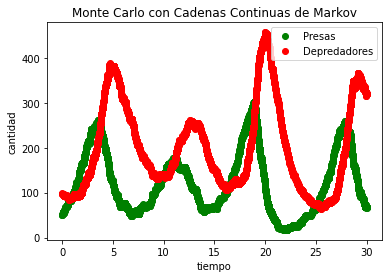

In [12]:
plt.plot(tiempo,presas, 'o', label=r'Presas', color="Green")
plt.plot(tiempo,depred,'o', label=r'Depredadores', color="Red")
plt.xlabel('tiempo')
plt.ylabel('cantidad')
plt.title("Monte Carlo con Cadenas Continuas de Markov")
plt.legend(loc='best')
plt.show()

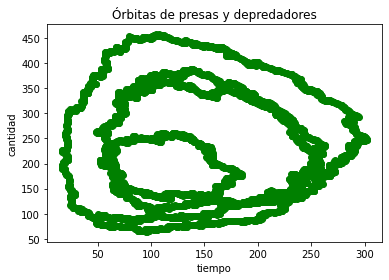

In [13]:
plt.plot(presas, depred, 'o', color="Green")
plt.xlabel('tiempo')
plt.ylabel('cantidad')
plt.title("Órbitas de presas y depredadores")
plt.show()